# K Analysis
## Originally for season start
### MSP 03.31.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


4 SP + 4 backup SP + 3 RP

Call it a 11$\times$12 = Top 132 pitchers.



In [2]:
#Clayton Kershaw (LAD - SP) 	203	244	17	0	2.35	0.94	53	156	35	17	29	29	6	1
#                                IP  K   W  S    ERA    WHIP    ER   H BB   HR
f = open('2017Pitching/projections2017.txt')

Dict = {}
KDict = {}
KIPDict = {}
IPDict = {}

for line in f:
    q = [d for d in line.split()]
    if len(q)==19:
        Dict[q[1]] = {}
        Dict[q[1]]['so'] = float(q[6])
        KDict[q[1]] = float(q[6])
        KIPDict[q[1]] = float(q[6])/float(q[5])
        IPDict[q[1]] = float(q[5])

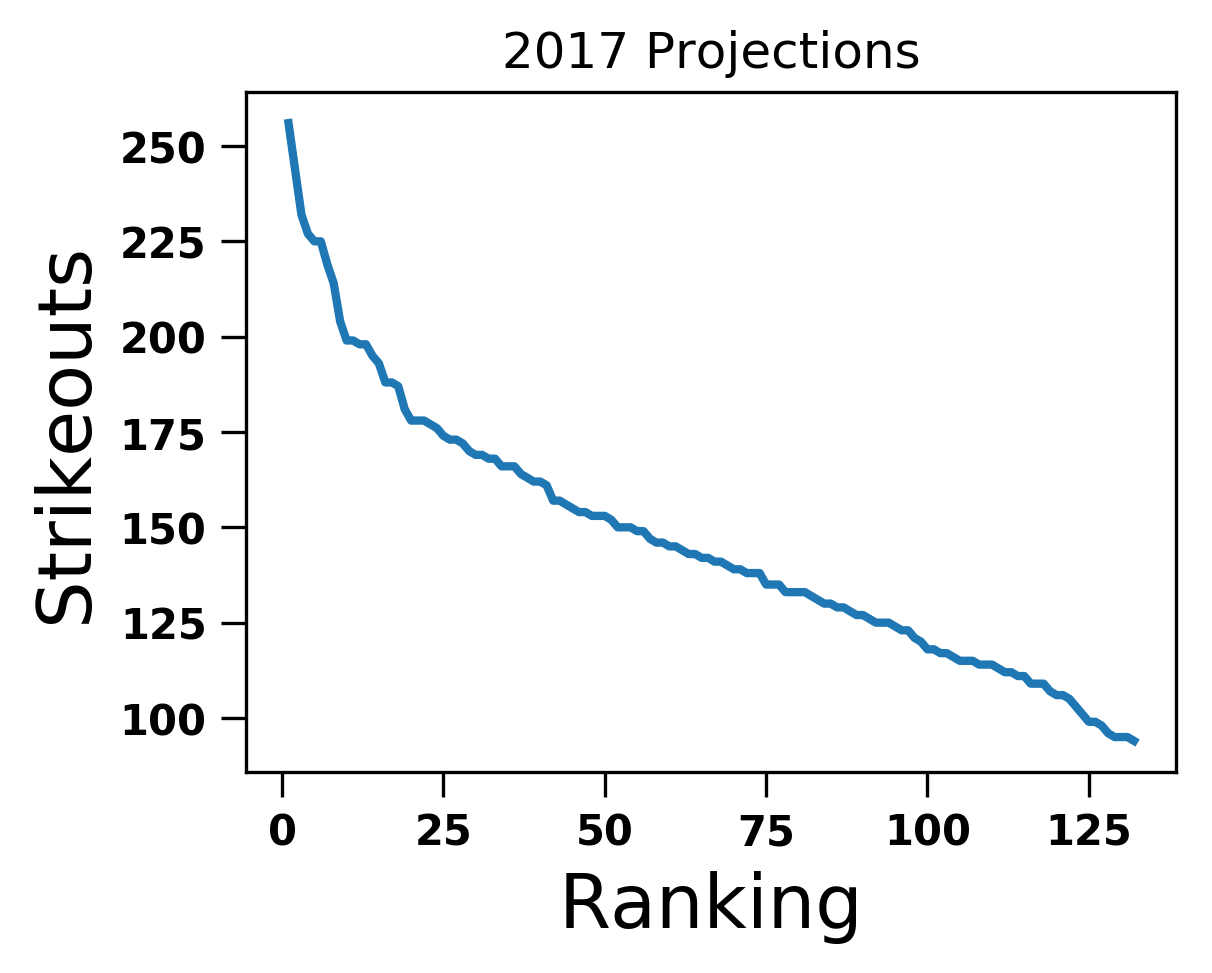

In [9]:
knum = np.array(KDict.values())
kindx = np.arange(0,len(knum),1)+1.#/float(len(knum))

plt.figure(figsize=(4,3))
plt.plot(kindx[0:132],knum[(-1.*knum).argsort()][0:132])


plt.title('2017 Projections')
plt.xlabel('Ranking',size=18)
plt.ylabel('Strikeouts',size=18)



In [4]:
#1	Clayton Kershaw (LAD - SP) 	149	172	12	0	1.69	0.72	28	97	11	8	21	21	4	0	50%
#0    1       2     3    4  5   6    7
#                                IP  K   W  S    ERA    WHIP    ER   H BB   HR
f = open('2016Pitching/projections2016.txt')

Dict2016 = {}
KDict2016 = {}
KIPDict2016 = {}
IPDict2016 = {}


for line in f:
    q = [d for d in line.split()]
    if len(q)==21:
        Dict2016[q[2]] = {}
        Dict2016[q[2]]['so'] = float(q[7])
        KDict2016[q[2]] = float(q[7])
        if float(q[6]) > 0.:
            KIPDict2016[q[2]] = float(q[7])/float(q[6])
            IPDict2016[q[2]] = float(q[6])

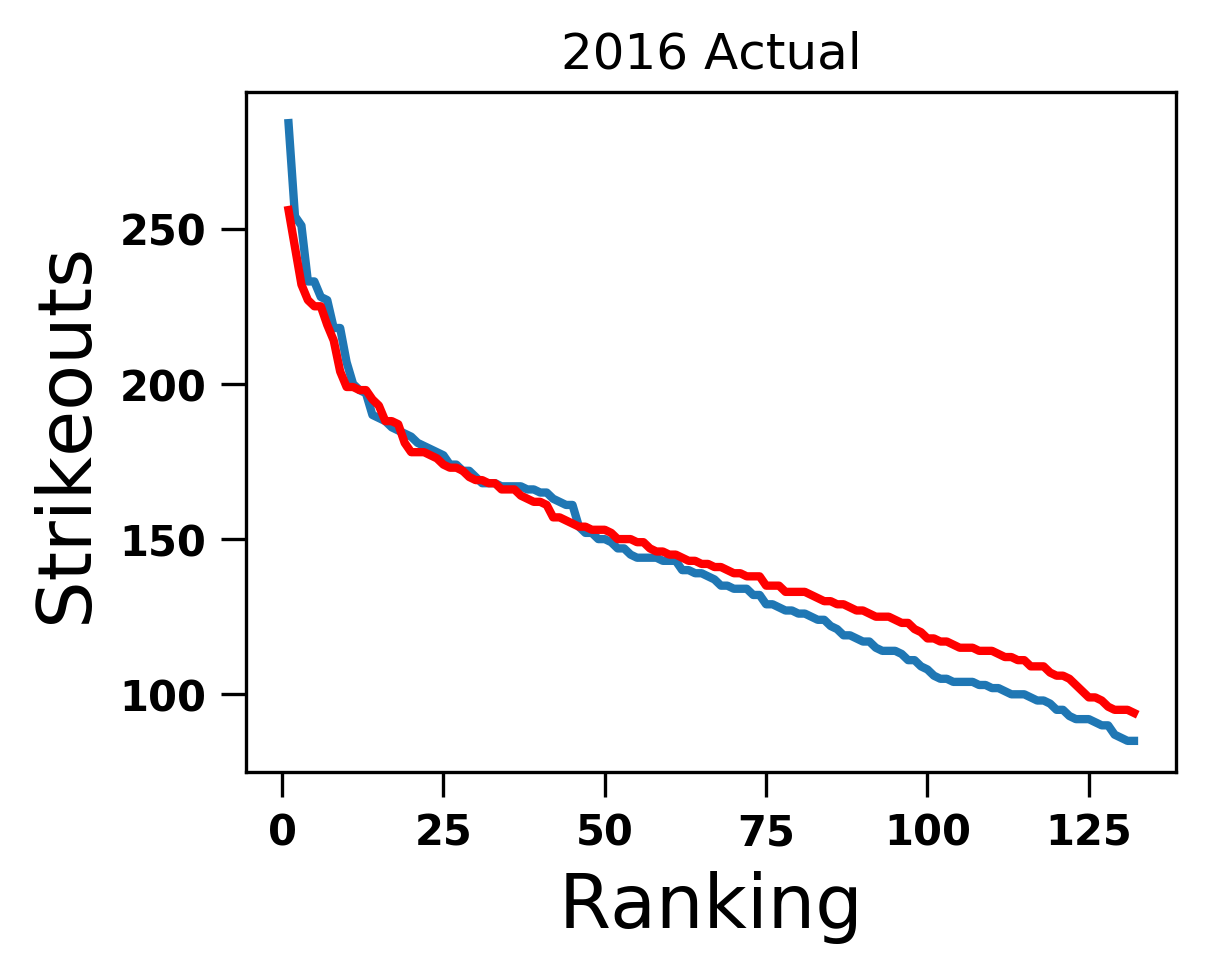

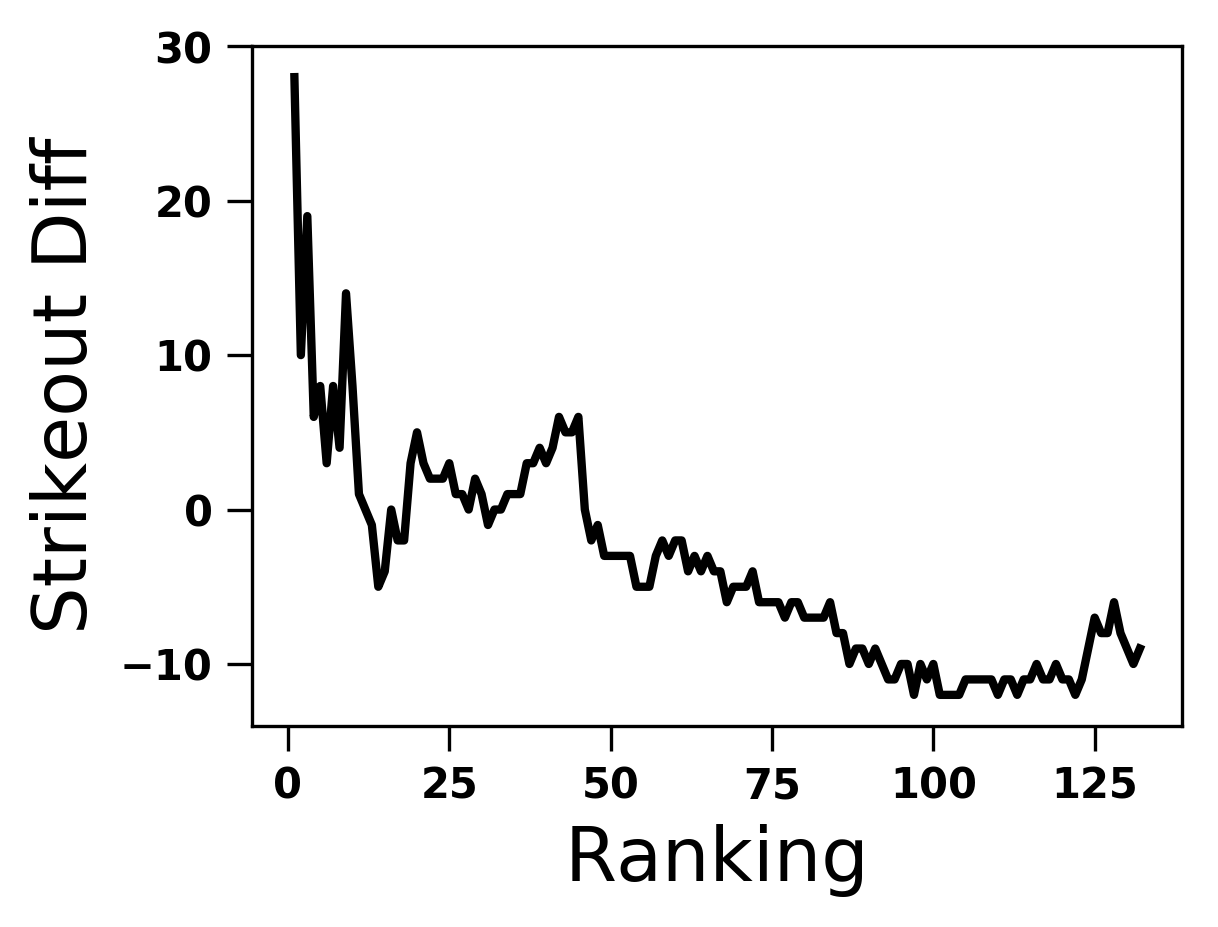

In [8]:
knum2016 = np.array(KDict2016.values())
kindx2016 = np.arange(0,len(knum),1)+1.#/float(len(knum))

plt.figure(figsize=(4,3))
plt.plot(kindx2016[0:132],knum2016[(-1.*knum2016).argsort()][0:132])
plt.plot(kindx[0:132],knum[(-1.*knum).argsort()][0:132],color='red')



plt.title('2016 Actual')

plt.xlabel('Ranking',size=18)
plt.ylabel('Strikeouts',size=18)

plt.figure(figsize=(4,3))
plt.plot(kindx2016[0:132],knum2016[(-1.*knum2016).argsort()][0:132]-knum[(-1.*knum).argsort()][0:132],color='black')

plt.xlabel('Ranking',size=18)
plt.ylabel('Strikeout Diff',size=18)


In [10]:

print '2017 PROJECTED 200 Ks --------------------------------------'
print len(np.where(knum >= 200.)[0])
for keyval in KDict:
    if KDict[keyval] >= 200.: print keyval
        
print '2016 REALIZED 200 Ks --------------------------------------'
print len(np.where(knum2016 >= 200.)[0])
for keyval in KDict2016:
    if KDict2016[keyval] >= 200.: print keyval

2017 PROJECTED 200 Ks --------------------------------------
9
Kluber
Sale
Syndergaard
Scherzer
Kershaw
Bumgarner
Verlander
Archer
Price
2016 REALIZED 200 Ks --------------------------------------
11
Kluber
Sale
Ray
Syndergaard
Scherzer
Bumgarner
Verlander
Archer
Price
Pineda
Hamels


In [11]:
print '2017 PROJECTED 200 INNs --------------------------------------'
for keyval in IPDict:
    if IPDict[keyval] >= 200.: print keyval
        
print '2016 REALIZED 200 INNs --------------------------------------'
for keyval in IPDict2016:
    if IPDict2016[keyval] >= 200.: print keyval

2017 PROJECTED 200 INNs --------------------------------------
Kluber
Sale
Scherzer
Kershaw
Bumgarner
Keuchel
Cueto
Verlander
Quintana
Porcello
Lester
Price
Hamels
2016 REALIZED 200 INNs --------------------------------------
Kluber
Tanaka
Sale
Roark
Stroman
Scherzer
Bumgarner
Cueto
Verlander
Archer
Quintana
Porcello
Lester
Price
Samardzija
Hamels


The implication of the work above was a few-fold:
1. Innings are crucial to being a good pitcher
2. Some surprising strikeout guys are lurking (Robbie Ray?!?)
3. Projects have regression baked in that varies based on the overall pitcher quality.

### Update for 6.25.17

Checking in on how the curves are doing, and what we might expect from full seasons.

In [23]:

import csv 

def read_pitching_data(infile):
    outdict = np.genfromtxt(\
                            #infile,\
                            ("\t".join(i) for i in csv.reader(open(infile))), delimiter="\t",\
        dtype={'names': ("Name","Team","W","L","ERA",\
                         "G","GS","CG","ShO","SV",\
                         "HLD","BS","IP","TBF","H",\
                         "R","ER","HR","BB","IBB",\
                         "HBP","WP","BK","SO","playerid"),\
                'formats': ('S20','S20','f4','f4','f4',\
                            'f4','f4','f4','f4','f4',\
                            'f4','f4','f4','f4','f4',\
                            'f4','f4','f4','f4','f4',\
                            'f4','f4','f4','f4','f4')},\
                 skip_header=1)#,delimiter=',')
    return outdict



Update = read_pitching_data('2017pitching/062517.csv')

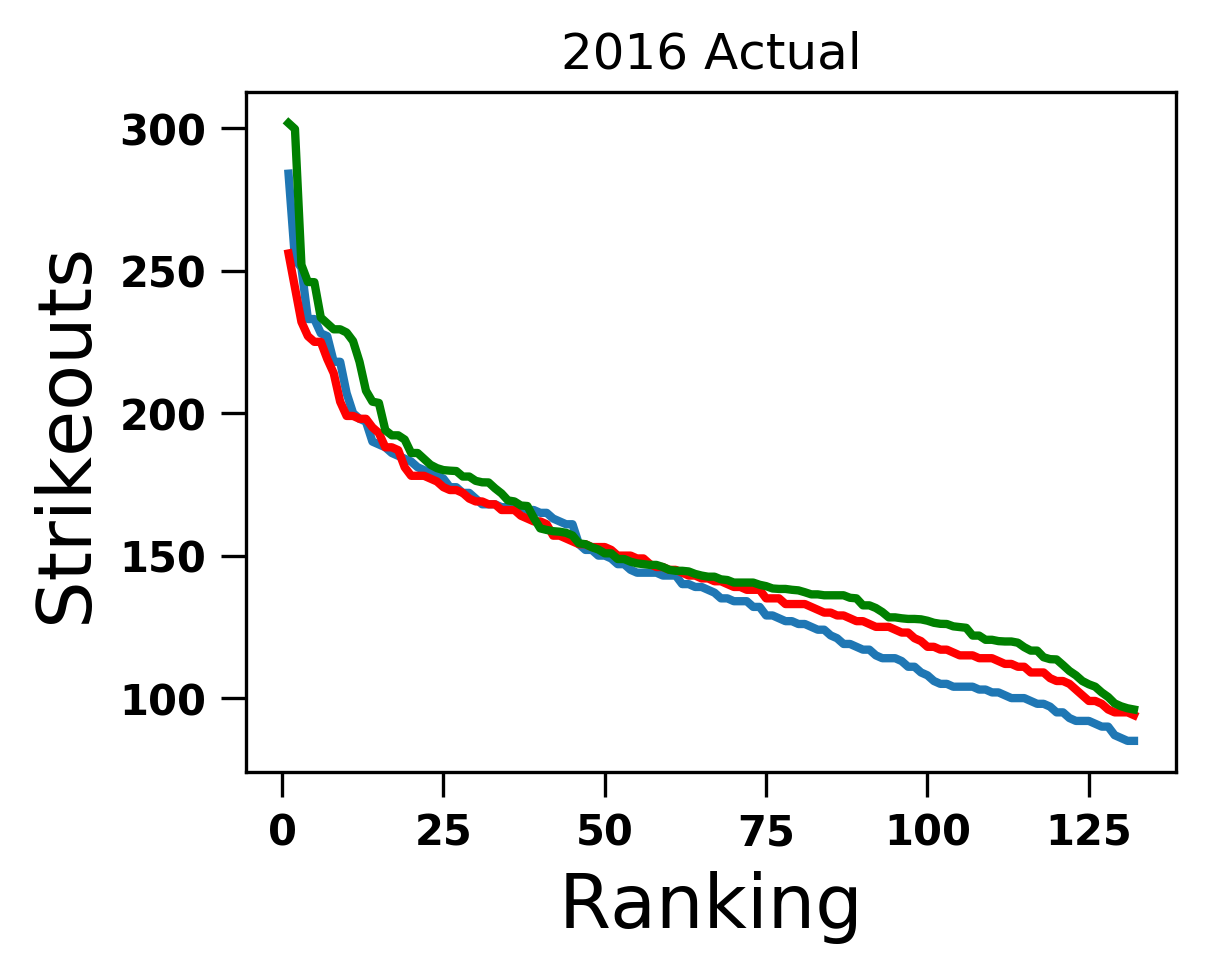

In [21]:
knum2016 = np.array(KDict2016.values())
kindx2016 = np.arange(0,len(knum),1)+1.#/float(len(knum))

# pretend 16 more starts at the current K rate.

FinalK = (Update['SO']*(Update['G']+16.))/Update['G']


plt.figure(figsize=(4,3))

# 2016 actual
plt.plot(kindx2016[0:132],knum2016[(-1.*knum2016).argsort()][0:132])

#2017 prediction
plt.plot(kindx[0:132],knum[(-1.*knum).argsort()][0:132],color='red')

#2017 actual
plt.plot(kindx[0:132],FinalK[(-1.*FinalK).argsort()][0:132],color='green')






plt.title('2016 Actual')

plt.xlabel('Ranking',size=18)
plt.ylabel('Strikeouts',size=18)



Chris Sale and Max Scherzer--on track for 300 Ks!

Interesting that the rough shape of the curve is already in place--e.g. the upturn is located in roughly the same spot.

In [29]:
# pretend 16 more starts at the current K rate.

FinalK = (Update['SO']*(Update['G']+16.))/Update['G']




Korder = (-1.*FinalK).argsort()

for i in range(0,15):
    print('{0:20s}{1:3.0f}'.format(Update['Name'][Korder][i],FinalK[Korder][i]))

Chris Sale          302
Max Scherzer        300
Chris Archer        252
Clayton Kershaw     246
Robbie Ray          246
Jacob deGrom        234
Jeff Samardzija     231
Zack Greinke        229
Carlos Martinez     229
Corey Kluber        228
Stephen Strasburg   225
Yu Darvish          218
Lance McCullers     208
Marco Estrada       204
Luis Severino       204


So I guess I'm forecasting 15 guys to get 200 Ks. Interesting. Admittedly, this is with no injuries, blah blah blah.

Let's check out innings--the other piece that was discussed.

In [32]:
# pretend 16 more starts at the current K rate.

FinalK = (Update['IP']*(Update['G']+16.))/Update['G']

Korder = (-1.*FinalK).argsort()

for i in range(0,12):
    print('{0:20s}{1:3.0f}'.format(Update['Name'][Korder][i],FinalK[Korder][i]))

Max Scherzer        222
Chris Sale          221
Clayton Kershaw     218
Ivan Nova           213
Chris Archer        208
Carlos Martinez     207
Ervin Santana       207
Jeff Samardzija     203
Yu Darvish          202
Zack Greinke        201
Jacob deGrom        200
Johnny Cueto        200
